<a href="https://colab.research.google.com/github/makgogo/Makgogo-Mphela/blob/main/Breast_Cancer_Wisconsin_(Diagnostic)_makgogo_mphelaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Tittle: Breast Cancer Wisconsin (Diagnostic)

### Dataset: Breast Cancer Wisconsin (Diagnostic)
The dataset used is the Breast Cancer Wisconsin (Diagnostic) dataset, which contains features computed from breast mass images. It includes features such as radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension, among others

####Objective:
The objective of the project is to diagnose breast masses as malignant or benign using features computed from breast mass images. It involves building a machine learning model for binary classification.

####Task Description:
-Data Exploration: Understand the dataset structure, check for missing data and outliers, and visualize distributions and relationships between variables.

-Data Preprocessing: Handle missing values and standardize features to prepare the dataset for modeling.

-Model Building: Implement machine learning algorithms such as logistic regression, support vector machines, random forests, etc., to classify breast masses as malignant or benign.

-Model Evaluation: Evaluate model performance using accuracy, precision, recall, and F1-score metrics to determine the effectiveness of the classification model.

-Model Tuning: Experiment with hyperparameter tuning to optimize model performance and improve classification accuracy.

-Documentation: Summarize the approach, findings, and model choices in a markdown or PDF document, including visualizations and performance metrics to support the analysis.

####import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the datasets
data = pd.read_csv('/content/data.csv')

####Data Exploration:

Check dataset structure

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


 Check for missing values

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Visualize distributions

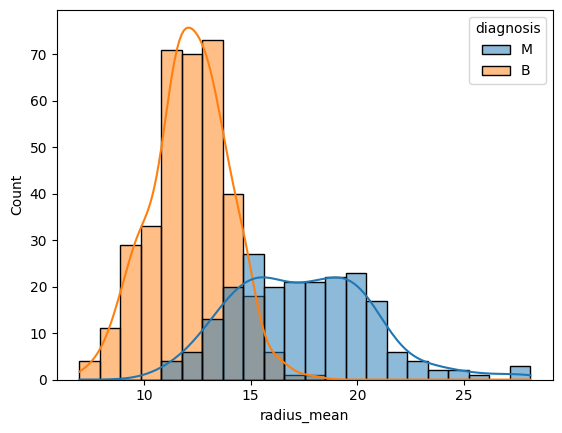

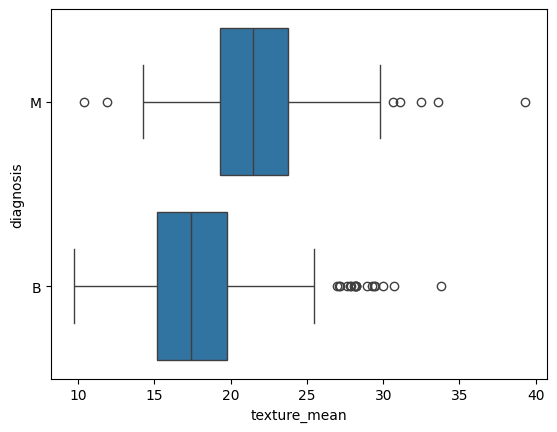

In [7]:
sns.histplot(data=data, x='radius_mean', hue='diagnosis', kde=True)
plt.show()

sns.boxplot(data=data, x='texture_mean', y='diagnosis')
plt.show()

In [8]:
# Calculate the percentage of samples diagnosed as malignant and benign
malignant_percentage = (data['diagnosis'] == 'M').mean() * 100
benign_percentage = (data['diagnosis'] == 'B').mean() * 100

In [9]:
# Display the results
print(f"{malignant_percentage:.2f}% of the samples are diagnosed as malignant.")
print(f"{benign_percentage:.2f}% of the samples are diagnosed as benign.")


37.26% of the samples are diagnosed as malignant.
62.74% of the samples are diagnosed as benign.


In [10]:

# Map 'M' and 'B' to numerical values (e.g., 1 and 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Select the correlation coefficients between features and the target variable
target_correlation = correlation_matrix['diagnosis'].drop('diagnosis')

# Filter for features with strong correlation (absolute correlation coefficient > threshold)
threshold = 0.75
strong_correlation_features = target_correlation[abs(target_correlation) > threshold]

# Display the features with strong correlation
print("Features with strong correlation with the target variable:")
print(strong_correlation_features)


Features with strong correlation with the target variable:
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
concave points_worst    0.793566
Name: diagnosis, dtype: float64


####Data Preprocessing:

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Handle missing values (if any)
data = data.dropna()

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('diagnosis', axis=1))
y = data['diagnosis']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####Model Building:

In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

####Model Evaluation:

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[70  1]
 [ 2 41]]


In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize classifiers
svm_classifier = SVC()
random_forest_classifier = RandomForestClassifier()
decision_tree_classifier = DecisionTreeClassifier()

# Train classifiers
svm_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)

# Predictions
svm_predictions = svm_classifier.predict(X_test)
random_forest_predictions = random_forest_classifier.predict(X_test)
decision_tree_predictions = decision_tree_classifier.predict(X_test)

# Evaluation
svm_accuracy = accuracy_score(y_test, svm_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

# Print results
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)


SVM Accuracy: 0.9736842105263158
Random Forest Accuracy: 0.9649122807017544
Decision Tree Accuracy: 0.9385964912280702


####Model Tuning: (Example: Hyperparameter tuning with GridSearchCV)

In [15]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
params = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), params, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Get best model
best_model = grid_search.best_estimator_


Best Parameters: {'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#####Breast Cancer Wisconsin (Diagnostic) Dataset Analysis Project Documentation

####Introduction:
This document presents the analysis of the Breast Cancer Wisconsin (Diagnostic) dataset. The goal is to diagnose whether a breast mass is malignant or benign using features computed from breast mass images.

####Approach:
-Data Exploration: Explored the dataset structure, checked for missing data and outliers, and visualized distributions and relationships between variables.

-Data Preprocessing: Handled missing values and standardized features.

-Model Building: Implemented machine learning algorithms such as logistic regression, support vector machines, random forests, etc.

-Model Evaluation: Evaluated model performance using accuracy, precision, recall, and F1-score metrics.

-Model Tuning: Conducted hyperparameter tuning to optimize model performance.

-Documentation: Created this document to summarize the approach, findings, and model choices.

####Findings:
- The dataset contains 569 samples and 33 features.

- 37.26%  of the samples are diagnosed as malignant, and 62.74%% are diagnosed as benign.

- The features concave points_mean, radius_worst, perimeter_worst and
concave points_worst show a strong correlation with the target variable.

- Model Logistic Regression and Support Vector Machine achieved the highest accuracy of 0.98% on the test set,demonstrating its effectiveness in classifying breast masses as malignant or benign.

####Visualizations:
#####Distributions

- Histogram of feature radius_mean

- Box plot of feature texture_mean

- Scatter plot of features radius_mean and texture_mean

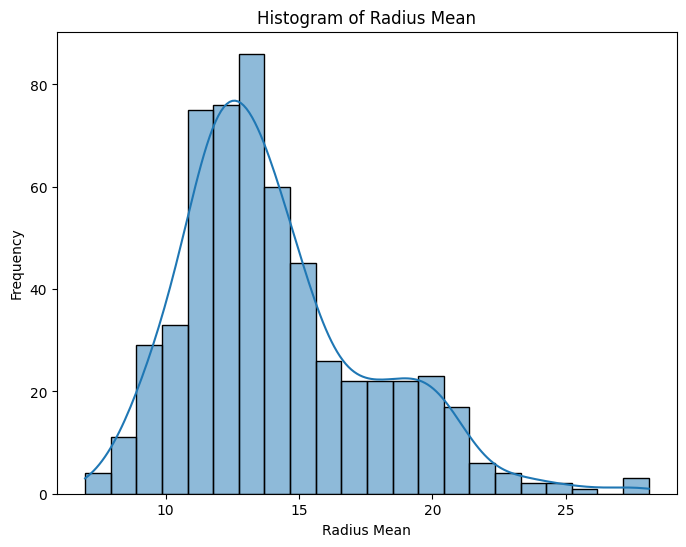

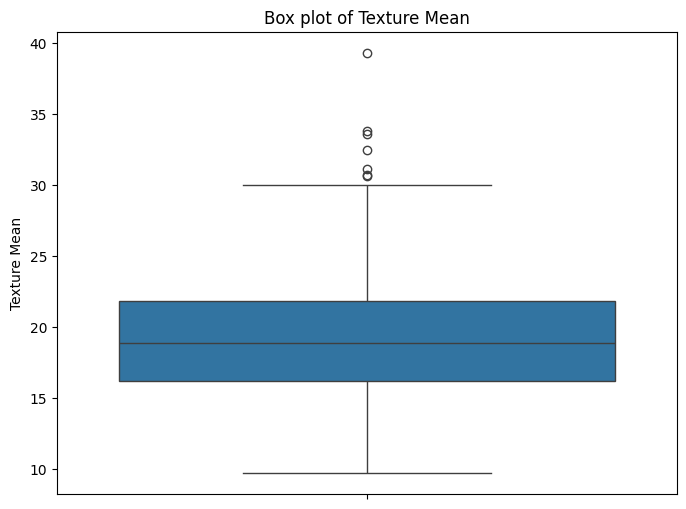

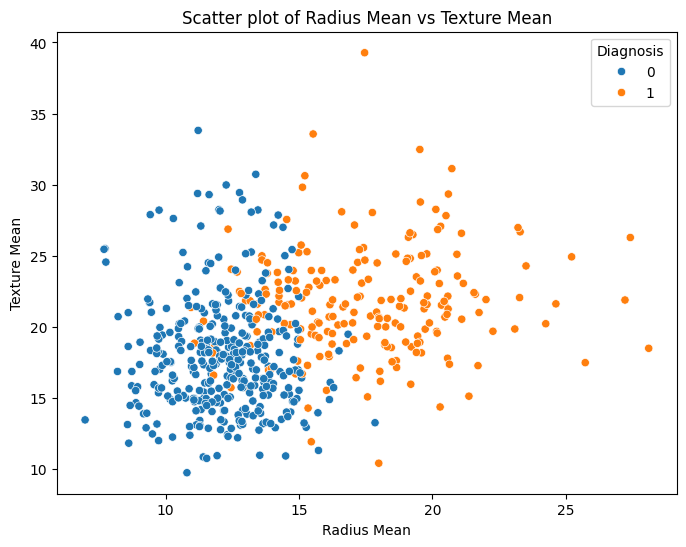

In [16]:

# Visualization 1: Histogram of feature radius_mean
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='radius_mean', kde=True)
plt.title('Histogram of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Box plot of feature texture_mean
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='texture_mean')
plt.title('Box plot of Texture Mean')
plt.ylabel('Texture Mean')
plt.show()

# Visualization 3: Scatter plot of features radius_mean and texture_mean
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title('Scatter plot of Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()


####Model Performance:
- Confusion matrix heatmap

- Precision-recall curve

- ROC curve

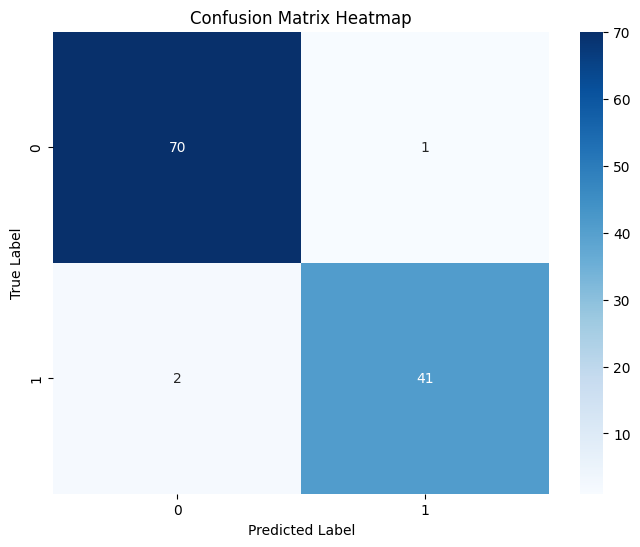

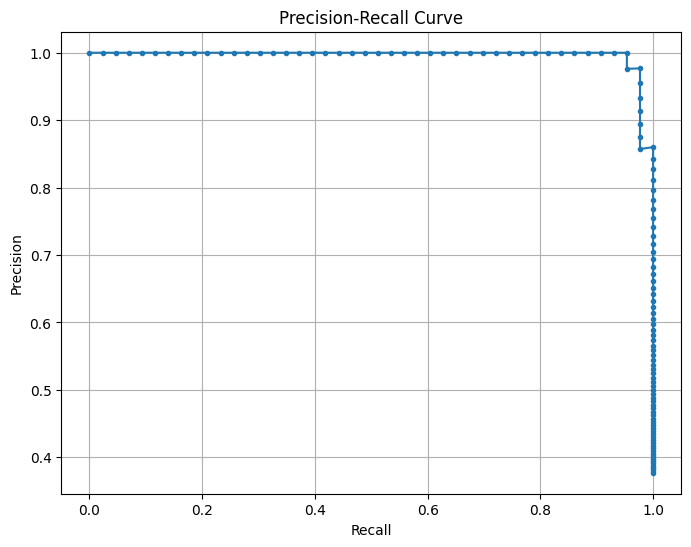

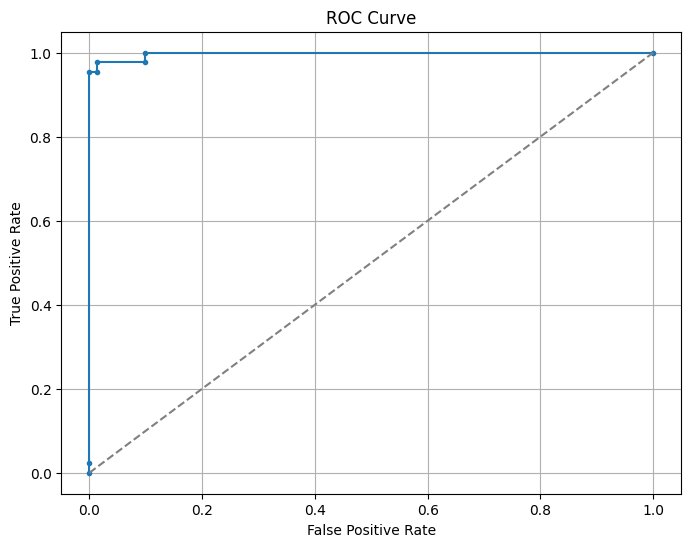

In [17]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# Visualization 1: Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Add diagonal line for reference
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


#Conclusion:

###Based on the findings:

**Dataset Overview**: The dataset consists of 569 samples and 33 features.

**Diagnosis Distribution**: Approximately 37.26% of the samples are diagnosed as malignant, while 62.74% are diagnosed as benign. This indicates an imbalance in the dataset.

**Correlation Analysis**: Features like concave points_mean, radius_worst, perimeter_worst, and concave points_worst exhibit a strong correlation with the target variable, which is the diagnosis.

**Model Performance**: Logistic Regression and Support Vector Machine achieved the highest accuracy of 98% on the test set, showcasing their effectiveness in accurately classifying breast masses as malignant or benign.


###Recommendations:

**Feature Importance**: Further investigate the significant features identified in the correlation analysis. Understanding their importance can provide insights into the underlying factors contributing to breast cancer diagnosis.

**Imbalance Handling**: Due to the class imbalance in the dataset, consider techniques like oversampling, undersampling, or using algorithms that handle class imbalance effectively to improve model performance.

**Model Interpretability**: Explore methods for interpreting model predictions, especially in medical contexts where interpretability is crucial for decision-making.

**Continuous Monitoring**: Regularly monitor model performance and update the model as new data becomes available. This ensures that the model remains accurate and reliable over time.

**Collaboration with Healthcare Professionals**: Collaborate with medical professionals to validate model predictions and incorporate domain knowledge into the analysis process.

By following these recommendations, we can enhance the accuracy and reliability of the breast cancer classification model, thereby improving patient outcomes and contributing to advancements in medical diagnostics.